In [1]:
import plotly.express as px
import plotly.io as pio
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns




<center><h1>Customer Churn Analysis</h1></center>



Reducing customer churn is crucial for the success of any business. In this chapter, we will:

- Examine customer churn, identifying the key factors that drive this behavior
- Our objective is to better understand the types of customers who are more likely to stop using our services and what behaviors might lead to this outcome.



In [2]:
churn = pd.read_csv("churn.csv")
churn_yes = churn[churn['Churn']=='Yes']
churn_no = churn[churn['Churn']=='No']

In [3]:
#Recoding dummy variables to support analysis 
churn_yes['Partner'] = churn_yes['Partner'].replace({'Yes': 1, 'No': 0})
churn_yes['SeniorCitizen'] = churn_yes['SeniorCitizen'].replace({'Yes': 1, 'No': 0})
churn_yes['Dependents'] = churn_yes['Dependents'].replace({'Yes': 1, 'No': 0})
churn_yes['gender'] = churn_yes['gender'].replace({'Male': 1, 'Female': 0})

C:\Users\valea\AppData\Local\Temp\ipykernel_23232\1038946555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_yes['Partner'] = churn_yes['Partner'].replace({'Yes': 1, 'No': 0})
C:\Users\valea\AppData\Local\Temp\ipykernel_23232\1038946555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_yes['SeniorCitizen'] = churn_yes['SeniorCitizen'].replace({'Yes': 1, 'No': 0})
C:\Users\valea\AppData\Local\Temp\ipykernel_23232\1038946555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

**<center><h4>1. Characteristics of the people that tend to churn</h4></center>**
To understand why some customers are leaving our services, we need to figure out who they are and what makes them tick. By getting to know them better, we can uncover the real reasons behind their decision to leave. 

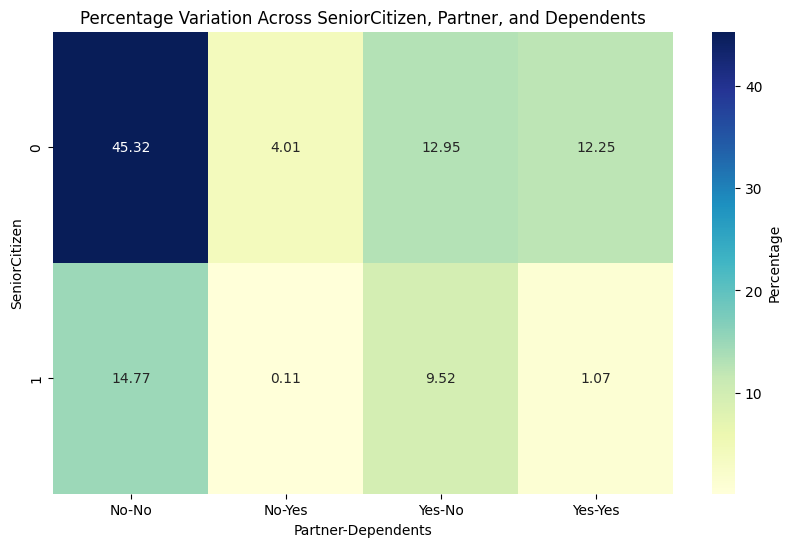

In [4]:
person_churn=churn_yes[['SeniorCitizen','Partner','Dependents']]
df = person_churn.value_counts(normalize=True).reset_index(name='proportion')
heatmap_data = df.pivot_table(index='SeniorCitizen', columns=['Partner', 'Dependents'], values='proportion')
heatmap_data.columns = heatmap_data.columns.map(lambda x: ('Yes', 'Yes') if x == (1, 1) else ('Yes', 'No') if x == (1, 0) else ('No', 'Yes') if x == (0, 1) else ('No', 'No'))
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data * 100, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})
plt.title('Percentage Variation Across SeniorCitizen, Partner, and Dependents')
plt.show()

From the heatmap, it can be inferred that among the customers that churn, approximately 45% of them are younger customers without dependants or partners. Hence, customers with these characteristics have a significantly higher tendency to churn. A hypothesis to explain this insight could be that younger people without dependants or partners are more flexible and independent as well as less resistant to change.

**<center><h4>2. Characteristics of their relationship with the company</h4></center>**
Now that we know some key characteristics of customers that tend to churn, lets analyze what relationship they had with the company.
 With the information that we have, we found significant insights in:
 
- Contract type 
- Payment method 
- Internet Service
- Extra Services
- When customers tend to churn 

In [5]:
mask_independent = (churn_yes['SeniorCitizen'] > 0) & (churn_yes['Partner'] > 0) & (churn_yes['Dependents'] > 0)
contract_churn=churn_yes[mask_independent].groupby(by='Contract').Churn.count().reset_index(name='count')
contract_churn['percentage'] = ((contract_churn['count'] / contract_churn['count'].sum()) * 100).round(2)

**<center><h4>2.1 Contract type</h4></center>**

In [6]:
custom_colors = ['#0072B2', '#009E73', '#56B4E9', '#01796F', '#76B7B2', '#1B9E77', '#77A0A3']  

fig1 = px.pie(contract_churn, names='Contract', values='percentage', title='Churning customers by contract type (not senior, no partner, no dependents)',
              template='plotly_dark', color_discrete_sequence=custom_colors)
fig1.update_traces(textinfo='percent',textposition='outside', textfont=dict(size=20, family='Arial', color='white'),
                   pull=[0.1, 0.1, 0.1])  

fig1.show()



<div align="center"><h2>80%</h2></div>

of the churning customers who were not senior, had no dependents and had no partner had month-to-month contracts. This aligns with our previous hypothesis regarding independent, young individuals, characterizing this segment of customers as unafraid of change or leaving for other companies. Potential reasons for the churn in this group may include switching to other providers, relocating, changing jobs, or leading a generally more unstable lifestyle compared to more senior customers with partners or dependents.



**<center><h4>2.2 Payment method</h4></center>**

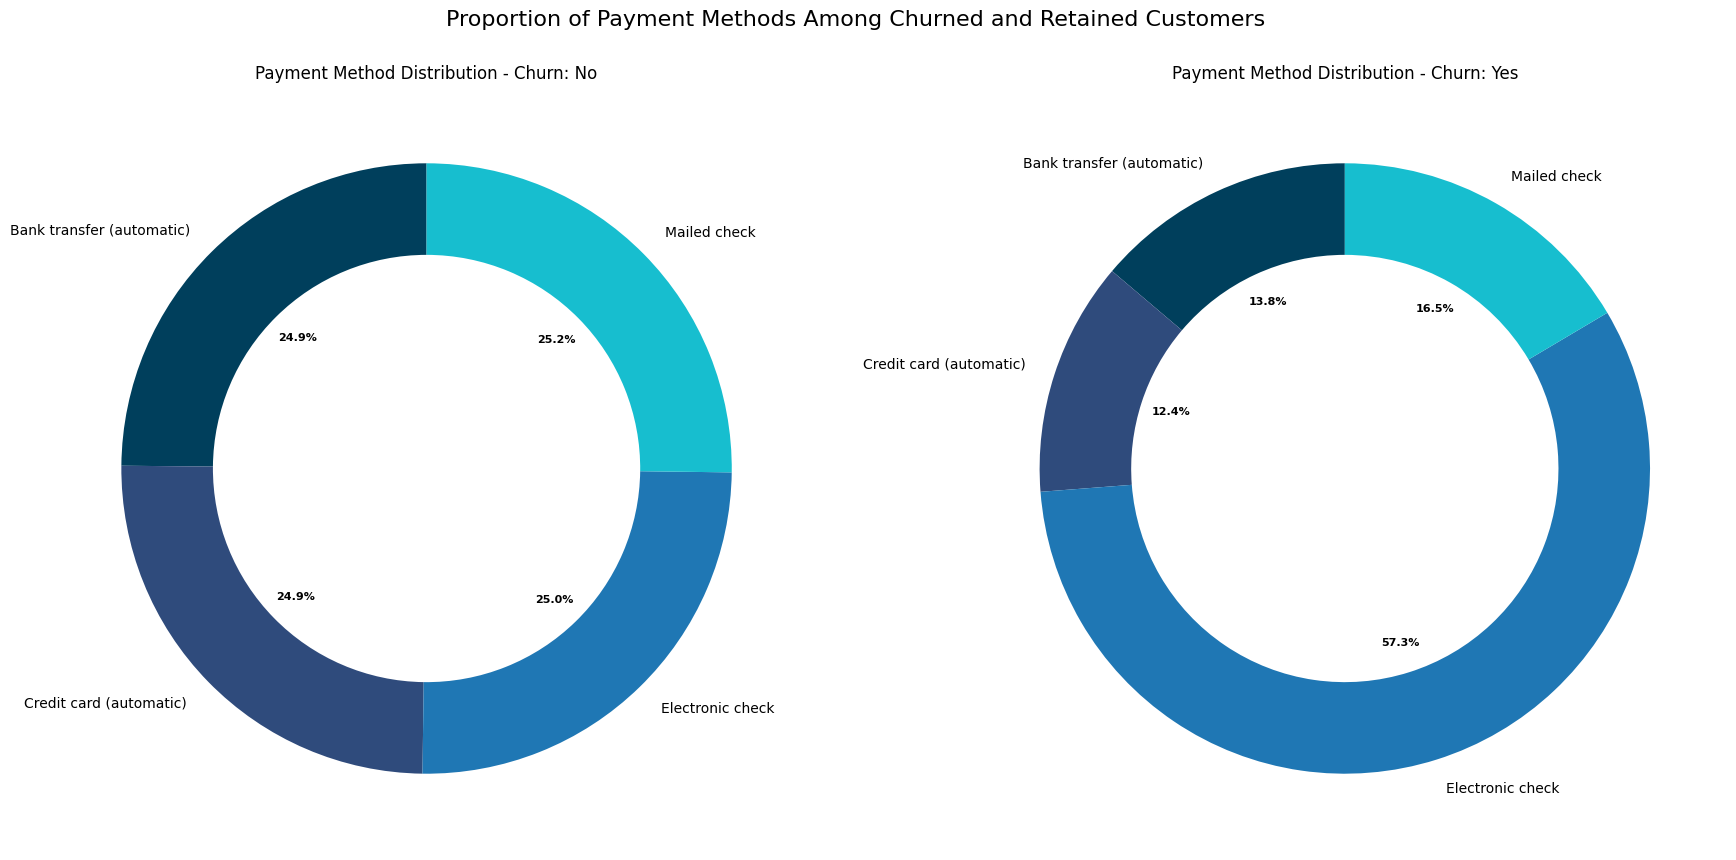

In [7]:
payment_method_grouped = churn.groupby(['Churn', 'PaymentMethod']).size().unstack()
churn_categories = churn['Churn'].unique()
fig, ax = plt.subplots(1, len(churn_categories), figsize=(18, 9), subplot_kw=dict(aspect="equal"))
blue_palette = ['#003f5c', '#2f4b7c', '#1f77b4', '#17becf', '#aec7e8', '#9edae5', '#7f7f7f', '#c5b0d5']

for i, churn_status in enumerate(churn_categories):
    sizes = payment_method_grouped.loc[churn_status]
    wedges, texts, autotexts = ax[i].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90,
                                         wedgeprops=dict(width=0.3), colors=blue_palette)
    ax[i].set_title(f'Payment Method Distribution - Churn: {churn_status}')
    plt.setp(autotexts, size=8, weight="bold")

plt.suptitle('Proportion of Payment Methods Among Churned and Retained Customers', size=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make space for the suptitle
plt.show()

<div align="center"><h4>In these diagrams we can infer that:</h4></div>

<div align="center"><h2>57.3%</h2></div>


of the customers that churn have electronic check as payment method. On the contrary, for the retained customers, the payments methods are evenly distributed.
This suggests that there is an issue related to the electronic check payment method, which seems to contribute to higher churn rates.


This analysis suggests that the choice of payment method, particularly the use of electronic checks, may be a significant factor in customer churn. It highlights the importance of evaluating the payment process and potentially improving or diversifying payment options to enhance customer satisfaction and retention. Understanding these dynamics helps in creating targeted strategies to reduce churn, such as offering incentives for using preferred payment methods or streamlining the electronic check process.


<center><h4>Out of 1869 people who have churned, 1071 paid via electronic check</h4></center>

**<center><h4>2.3 Internet Service hired</h4></center>**

In [8]:
internet_churn_no = churn_no[['InternetService']]
internet_churn_no = internet_churn_no[((churn_no['InternetService'] == 'DSL') | (churn_no['InternetService'] == 'Fiber optic'))]
internet_churn_counts_no = internet_churn_no['InternetService'].value_counts(normalize=True).reset_index(name='percentage')
internet_churn_counts_no['percentage'] = internet_churn_counts_no['percentage'] * 100
internet_churn_counts_no
internet_churn_yes = churn_yes[['InternetService']]
internet_churn_yes =  internet_churn_yes[((churn_yes['InternetService'] == 'DSL') | (churn_yes['InternetService'] == 'Fiber optic'))]
internet_churn_counts_yes = internet_churn_yes['InternetService'].value_counts(normalize=True).reset_index(name='percentage')
internet_churn_counts_yes['percentage'] = internet_churn_counts_yes['percentage'] * 100

In [9]:
custom_colors = ['#0072B2', '#009E73', '#56B4E9', '#01796F', '#76B7B2', '#1B9E77', '#77A0A3']  

fig3 = px.pie(internet_churn_counts_no, names='index', values='percentage', title='Percentage per internet service for customers who stayed',
              template='plotly_dark', color_discrete_sequence=custom_colors)
fig3.update_traces(textinfo='percent',textposition='outside', textfont=dict(size=20, family='Arial', color='white'),
                   pull=[0.1, 0.1, 0.1])  

fig3.show()

In [10]:
custom_colors = ['#0072B2', '#009E73', '#56B4E9', '#01796F', '#76B7B2', '#1B9E77', '#77A0A3']  

fig4 = px.pie(internet_churn_counts_yes, names='index', values='percentage', title='Percentage per internet service for customers who churned',
              template='plotly_dark', color_discrete_sequence=custom_colors)
fig4.update_traces(textinfo='percent',textposition='outside', textfont=dict(size=20, family='Arial', color='white'),
                   pull=[0.1, 0.1, 0.1])  

fig4.show()

<div align="center"><h2>73.9%</h2></div>
<div align="center">of the customers who churned had fiber optic<div>




Comparing the graphs, we can definitely see a signficance since more than 50% of the people who stay have DSL. This suggests that there is an issue related to the fiber optic service that increases the likelihood of customer churn.

**<center><h4>2.4 Extra services </h4></center>**

 **<center><h4>Customers that churn tend to not have any other extra-services hired</h4></center>**

 Below, we will generate insights to support this statement.

In [11]:
churn_internet_dsl = churn[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']]
churn_internet_dsl = churn_internet_dsl[churn['InternetService'] == 'DSL']

df_melted_dsl = pd.melt(churn_internet_dsl, id_vars=['Churn'], var_name='Service', value_name='YesNo')

grouped = df_melted_dsl.groupby(['Service', 'Churn', 'YesNo']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['Service', 'Churn'])['Count'].apply(lambda x: x / x.sum() * 100)


color_discrete_map = {'Yes': '#1f77b4', 'No': '#ff7f0e'}

fig = px.bar(grouped, x='Service', y='Percentage', color='YesNo', facet_col='Churn', barmode='group',
             category_orders={'YesNo': ['Yes', 'No'], 'Churn': ['Yes', 'No']},
             labels={'Service': 'Service', 'YesNo': 'Response'},
             title='DSL Service Usage (in Percentages) Among Customers Who Churned vs. Those Who Didn\'t',
             color_discrete_map=color_discrete_map,
             template='plotly_dark')

fig.show()

C:\Users\valea\AppData\Local\Temp\ipykernel_23232\2458033666.py:7: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



From the graph we can infer that approximately 75% of the customers who had DSL internet and churned didn't have services hired. On the contrary, people who stay are more likely to have services hired.

In [12]:
churn_internet_fiber = churn[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']]
churn_internet_fiber = churn_internet_fiber[churn['InternetService'] == 'Fiber optic']

df_melted_fiber = pd.melt(churn_internet_fiber, id_vars=['Churn'], var_name='Service', value_name='YesNo')

grouped = df_melted_fiber.groupby(['Service', 'Churn', 'YesNo']).size().reset_index(name='Count')
grouped['Percentage'] = grouped.groupby(['Service', 'Churn'])['Count'].apply(lambda x: x / x.sum() * 100)

color_discrete_map = {'Yes': '#1f77b4', 'No': '#ff7f0e'}

fig = px.bar(grouped, x='Service', y='Percentage', color='YesNo', facet_col='Churn', barmode='group',
             category_orders={'YesNo': ['Yes', 'No'], 'Churn': ['Yes', 'No']},
             labels={'Service': 'Service', 'YesNo': 'Response'},
             title='Fiber Optic Service Usage (in Percentages) Among Customers Who Churned vs. Those Who Didn\'t',
             color_discrete_map=color_discrete_map,
             template='plotly_dark')

fig.show()

C:\Users\valea\AppData\Local\Temp\ipykernel_23232\2208701077.py:7: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



Similarly, approximately 66% of the customers that had Fiber Optic internet and churned, didn't have services hired.

The graphs show how  services subscriptions may significantly influence customer loyalty, particularly among DSL users. It reveals a strong difference in the subscription to additional services between customers who discontinued their service and those who remained. 

We suggests that developing and promoting offers, could be a strategic move to increase customer satisfaction and loyalty.

**<center><h4>2.5 Churn timing</h4></center>**

Now, let's dive into when customers tend to churn to identify when it is important to take action and avoid their possible churn:
<div align="center"><h4>So... when do customers churn?</h4></div>

In [13]:
churn_tenure=churn_yes[['tenure']]
churn_tenure['tenure_range']= pd.cut(churn_tenure['tenure'], bins=range(0,80,5))
churn_tenure=churn_tenure.groupby(by='tenure_range').size().reset_index(name='count')
churn_tenure['count']= churn_tenure['count']/churn_tenure['count'].sum()*100
churn_tenure['tenure_range']=churn_tenure['tenure_range'].astype(str)

C:\Users\valea\AppData\Local\Temp\ipykernel_23232\4206763841.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
fig5 = px.bar(churn_tenure, x='tenure_range', y='count', title='Tenure',
             template='plotly_dark', opacity=0.8,
             text=churn_tenure['count'].apply(lambda x: f'{x:.2f}%'),
             color=churn_tenure['count'], color_continuous_scale='blues')


fig5.update_traces(textposition='outside', marker=dict(line=dict(color='black', width=1)))
fig5.update_xaxes(title='Tenure Range')
fig5.update_yaxes(title='Percentage')
fig5.show()

<div align="center"><h4>40% of them leave within the first 5 months</h4></div>

Based on the insights we have generated until now, here are some suggested key actions that we should take:

- Encourage yearly contracts type when signing by doing packages or offer free services. This will improve the customer satisfaction and may incentivize them to stay.
- Review payment methods or gain an understanding of what is happening with electronic checks - there is likely something unsatisfactory related to this payment method.
- Boost sales of the services 

Furthermore, the team proposes to introduce annual packages that offer enticing discounts to promote our services. Additionally, we can explore partnerships with non-senior citizen-focused entities, such as collaborating with Netflix to offer exclusive discounts when customers subscribe to our streaming services. This strategic approach aims to enhance customer retention and attract a broader audience.

**<center><h4>3.0 Opportunities </h4></center>**

It's always important to identify extra opportunities. We have identified two potential opportunites related to:
- Fiber optic tendency 
- Services

**<center><h4>3.1 Fiber optic is the most expensive but the most apealing for customers</h4></center>**
<center><h4>56.1% of the people hire fiber optic, as opposed to 43.9% who hire DSL</h4></center>

In [15]:
churn_internet=churn[(churn['InternetService'] == 'DSL') | (churn['InternetService'] == 'Fiber optic')]
churn_internet=churn_internet['InternetService']
churn_internet=churn_internet.value_counts(normalize=True).reset_index()
churn_internet['InternetService']=churn_internet['InternetService']*100

In [16]:
custom_colors = ['#0072B2', '#009E73', '#56B4E9', '#01796F', '#76B7B2', '#1B9E77', '#77A0A3']  

fig6 = px.pie(churn_internet, names='index', values='InternetService', title='Customers by internet type',
              template='plotly_dark', color_discrete_sequence=custom_colors)
fig6.update_traces(textinfo='percent',textposition='outside', textfont=dict(size=20, family='Arial', color='white'),
                   pull=[0.1, 0.1, 0.1])  # Use 'pull' to place labels outside the pie chart

fig6.show()

The higher volume of Fiber Optic customers, despite its higher cost, reflects the market's response to the need for speed and reliability in internet services. This trend highlights the importance of technological advancement and perceived value in influencing consumer choices. As Fiber Optic technology offers significantly higher speeds and more reliable internet connections than DSL,consumers are increasingly choosing quality and performance over cost, especially for a service as integral to daily life as the internet.

In [17]:
churn_prices=churn_no[['PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','MonthlyCharges']]
churn_pay=churn_no[['InternetService','MonthlyCharges']]
churn_pay=churn_prices[(churn_pay['InternetService'] == 'DSL') | (churn_pay['InternetService'] == 'Fiber optic')]
px.box(churn_pay, x="InternetService", y="MonthlyCharges", template="plotly_dark")

<div align="center"><h4>People are willing to pay</h4></div>

<div align="center"><h2>40+ euros for better service</h2></div>

<div align="center"><p>It is not a secret that Fiber optic provides better service than DSL, and more than 50% of people that are still with us are willing to pay for it. This means that we know that our clients will pay more for better services, so let's dive into how we can boost the services.</p></div>

**<center><h4>3.1 Services sales boost opportunties </h4></center>**

In [18]:
churn_yes_corr=churn_yes
churn_no_corr=churn_no

In [19]:
churn_no_corr['PhoneService'] = churn_no_corr['PhoneService'].replace({'Yes': 1, 'No': 0})
churn_no_corr['MultipleLines'] = churn_no_corr['MultipleLines'].replace({'Yes': 1, 'No':0,'No phone service': 0})
churn_no_corr['InternetService'] = churn_no_corr['InternetService'].replace({'DSL': 1, 'Fiber optic': 2, 'No': 0})
churn_no_corr['OnlineSecurity'] = churn_no_corr['OnlineSecurity'].replace({'Yes': 1, 'No':0,'No internet service': 0})
churn_no_corr['OnlineBackup'] = churn_no_corr['OnlineBackup'].replace({'Yes': 1, 'No':0,'No internet service': 0})
churn_no_corr['DeviceProtection'] = churn_no_corr['DeviceProtection'].replace({'Yes': 1, 'No':0,'No internet service': 0})
churn_no_corr['TechSupport'] = churn_no_corr['TechSupport'].replace({'Yes': 1, 'No':0,'No internet service': 0})
churn_no_corr['StreamingTV'] = churn_no_corr['StreamingTV'].replace({'Yes': 1, 'No':0,'No internet service': 0})
churn_no_corr['StreamingMovies'] = churn_no_corr['StreamingMovies'].replace({'Yes': 1, 'No':0,'No internet service': 0})
columns=['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
corr_no=churn_no_corr[columns].corr()

C:\Users\valea\AppData\Local\Temp\ipykernel_23232\1195339408.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\valea\AppData\Local\Temp\ipykernel_23232\1195339408.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\valea\AppData\Local\Temp\ipykernel_23232\1195339408.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

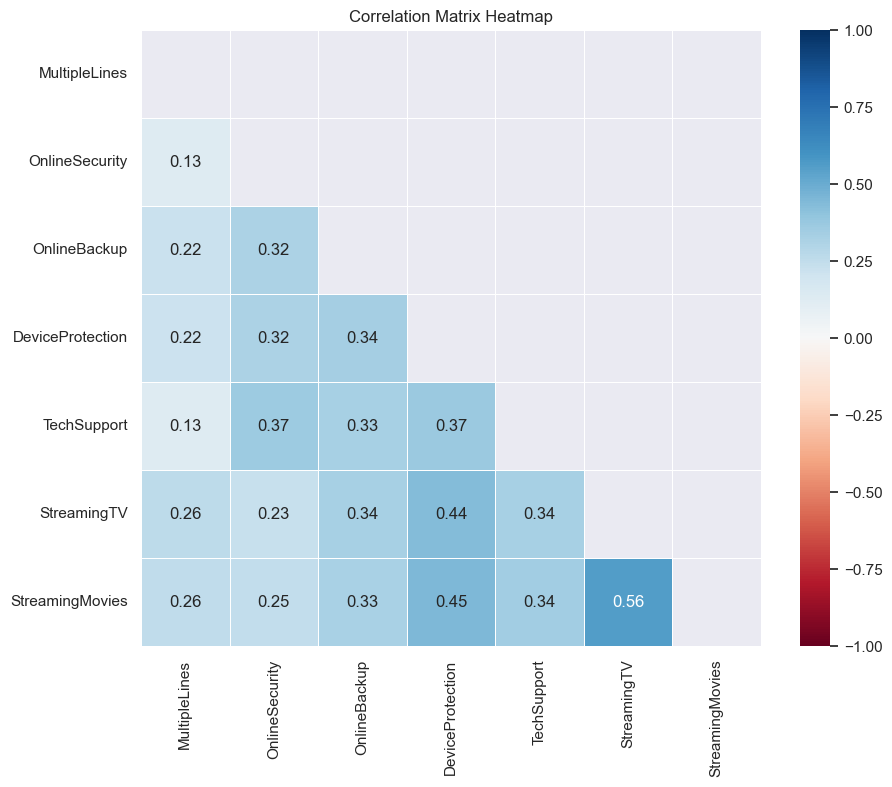

In [20]:
corr_matrix = churn_no_corr[columns].corr()
corr_matrix = corr_matrix.mask(np.triu(np.ones(corr_matrix.shape)).astype(bool))
plt.figure(figsize=(10, 8))
sns.set(style="dark")
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f",
            linewidths=.5, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.show()

There is a boost opportunity in services. Since we already know that having services relate with customer experience and the likelihood of them to be sastfied with the company and to not churn, we found some relation between them.

<div align="center"><h4>In this way we can infer how a purchase of a service affects the likelihood to buy another service.</h4></div>
  
- There is a correlation of 0.56 between StreamingTV and StreamingMovies, suggesting a high likelihood of these services being bought together.
- Also, we can see the high correlation between DeviceProtection and each of the other services. This suggests that a person that purchases DeviceProtection is more likely to purchase the other services too. 

To take advantage of these insights, we can create relevant service packages as well as emphasize the offer of the services during the time of purchase. 